# Overview
Continuing with the previous notebook, we will now train our model.
| | |
| --------- | --------------------------- |
| Notebook  | 3_ModelTrain.ipynb    |
| Builds On | DataCleansing |
| Time to complete | 20 minutes

First, execute this code to create the data frame.


<Axes: xlabel='duration', ylabel='Count'>

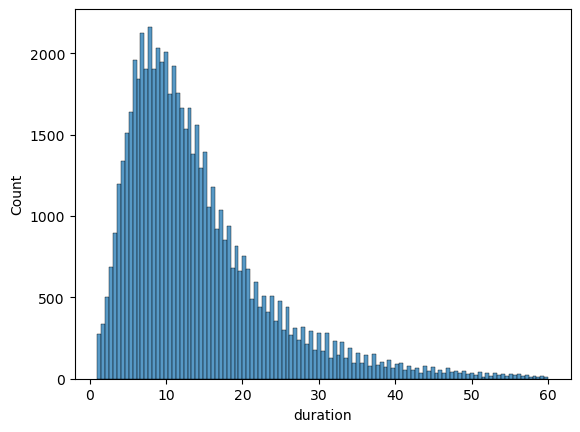

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LinearRegression  # this is your ALGORITHM
from sklearn.metrics import mean_squared_error

df = pd.read_pickle('tripdata.pkl')
df['duration'] = (df['lpep_dropoff_datetime'] - df['lpep_pickup_datetime']).dt.total_seconds() / 60
df = df[(df.duration > 1) & (df.duration < 60)]
sns.histplot(df['duration'])

## Step 3: Categories and Numerical Values
We will use the pick up and drop of location IDs as categories and the trip distance as the numerical value.

In [9]:
categorical = ['PULocationID', 'DOLocationID']
numerical = ['trip_distance']
df[categorical] = df[categorical].astype(str)
df.describe()


,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,RatecodeID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,duration
count,62544.000000,62544,62544,57815.000000,57815.000000,62544.000000,62544.000000,62544.000000,62544.000000,62544.000000,62544.000000,0.0,62544.000000,62544.000000,57815.000000,57813.000000,57815.000000,62544.000000
mean,1.869100,2023-02-14 21:44:36.894314,2023-02-14 21:58:37.388270,1.083231,1.296861,13.987418,16.378636,0.861163,0.577881,2.169967,0.177529,NaN,0.958455,21.675748,1.358367,1.017141,0.755855,14.008233
min,1.000000,2023-01-25 19:32:54,2023-01-25 19:43:20,1.000000,0.000000,0.000000,-113.490000,-2.500000,-0.500000,0.000000,-6.550000,NaN,-1.000000,-94.840000,1.000000,1.000000,-2.750000,1.016667
25%,2.000000,2023-02-07 23:01:59,2023-02-07 23:14:12.500000,1.000000,1.000000,1.190000,9.300000,0.000000,0.500000,0.000000,0.000000,NaN,1.000000,13.070000,1.000000,1.000000,0.000000,7.533333
50%,2.000000,2023-02-14 19:38:18.500000,2023-02-14 19:51:31,1.000000,1.000000,1.910000,13.500000,0.000000,0.500000,1.820000,0.000000,NaN,1.000000,18.050000,1.000000,1.000000,0.000000,11.666667
75%,2.000000,2023-02-21 22:30:49.500000,2023-02-21 22:42:56,1.000000,1.000000,3.390000,19.800000,1.000000,0.500000,3.400000,0.000000,NaN,1.000000,26.190000,2.000000,1.000000,2.750000,17.750000
max,2.000000,2023-03-01 00:01:06,2023-03-01 00:25:00,99.000000,6.000000,178919.980000,188.500000,12.700000,1.500000,80.000000,45.350000,NaN,1.000000,222.540000,4.000000,2.000000,2.750000,59.983333
std,0.337293,NaN,NaN,0.796539,0.947966,947.693174,11.048449,1.285798,0.379472,2.773991,1.121984,NaN,0.178248,13.279079,0.495107,0.129800,1.228143,9.311493


## Step 4: Building the Model
Use the comments below to transform the data into a sparse matrix and train the model.

In [10]:
# create a dictionary for each row in the dataframe
train_dicts = df[categorical + numerical].to_dict(orient='records')
train_dicts

[{'PULocationID': '74', 'DOLocationID': '265', 'trip_distance': 10.8},
 {'PULocationID': '216', 'DOLocationID': '196', 'trip_distance': 4.76},
 {'PULocationID': '7', 'DOLocationID': '114', 'trip_distance': 6.32},
 {'PULocationID': '74', 'DOLocationID': '239', 'trip_distance': 3.5},
 {'PULocationID': '82', 'DOLocationID': '223', 'trip_distance': 3.14},
 {'PULocationID': '92', 'DOLocationID': '121', 'trip_distance': 2.52},
 {'PULocationID': '244', 'DOLocationID': '42', 'trip_distance': 1.96},
 {'PULocationID': '75', 'DOLocationID': '41', 'trip_distance': 1.46},
 {'PULocationID': '95', 'DOLocationID': '121', 'trip_distance': 2.38},
 {'PULocationID': '97', 'DOLocationID': '97', 'trip_distance': 0.88},
 {'PULocationID': '75', 'DOLocationID': '74', 'trip_distance': 0.83},
 {'PULocationID': '112', 'DOLocationID': '188', 'trip_distance': 5.25},
 {'PULocationID': '95', 'DOLocationID': '135', 'trip_distance': 1.43},
 {'PULocationID': '95', 'DOLocationID': '95', 'trip_distance': 0.51},
 {'PULocat

In [11]:

# Create a DictVectorizer object
dv = DictVectorizer()

# Use the DictVectorizer to transform the training data
X_train = dv.fit_transform(train_dicts)  
X_train

<1x463 sparse matrix of type '<class 'numpy.float64'>'
	with 3 stored elements in Compressed Sparse Row format>

In [15]:

target = 'duration'   # this is my y value... what I'm trying to predict
y_train = df[target].values

#TODO: Create a linear regression object
lr = LinearRegression()
#TODO: Fit the model
lr.fit(X_train, y_train)
#TODO: Predict the duration of the trip for each row in the training data
y_pred = lr.predict(X_train)
#TODO: Calculate the RMSE of the model on the training data
lr.score(X_train, y_train)


0.39764431626866337

In [16]:

rmse = mean_squared_error(y_train, y_pred, squared=False)
rmse

c:\Users\chuck_vbrk0he\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


7.226738834844508

### Plot the results
Finally, plot the results and see how the model performs.

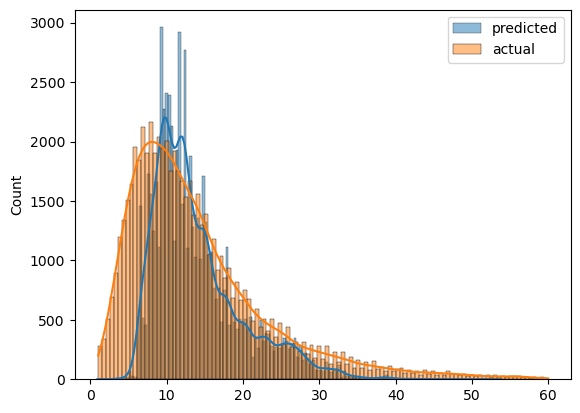

In [13]:
sns.histplot(y_pred, label='predicted', kde=True)
sns.histplot(y_train, label='actual', kde=True)
plt.legend()